In [5]:
# Configure the matplotlib graphics library and configure it to show 
# figures inline in the notebook

%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
# import sys, os
# rootDir = '/path/to/arc/directory' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
# sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

本段为选择**原子类型**。

 - 输入 1 选择 Caesium （输入其他内容时的默认选项）
 - 输入 2 选择 Rubidium85
 - 输入 3 选择 Rubidium87

In [6]:
x = input("请选择原子：Caesium（1），Rubidium85（2），Rubidium87（3）")
if('2' == x):
    atom = Rubidium85()
    print("atom 设为 Rubidium85")
elif ('3' == x):
    atom = Rubidium87()
    print("atom 设为 Rubidium87")
else:
    atom = Caesium()
    print("atom 设为 Caesium")

atom

atom 设为 Caesium


计算两能级之间的跃迁频率

In [7]:
#计算两能级之间的跃迁频率
def MHzBetweenLevels( n1,l1,j1,n2,l2,j2 ):
    print('L1(%3d,%3d,%5.1f)L2(%3d,%3d,%5.1f)' %(n1,l1,j1,n2,l2,j2))
    energy1 = atom.getEnergy(n1,l1,j1)
    energy2 = atom.getEnergy(n2,l2,j2)
            #print('n= %d l = %d j = %4.1f %.5f'%(n ,l , j  , energy))
    print("energy1:%10.5f(eV)" %energy1)
    print("energy2:%10.5f(eV)" %energy2)
    print("energyDiff:%10.5f(eV)" %abs(energy1-energy2))
    
    h_eVs = C_h / C_e
    print('h in eVs: %.5e eVs'%h_eVs)
    Hz = abs(energy1-energy2)/h_eVs
    print("Hz:%5.4f" %Hz)
    print('MHz:%.6e' % (Hz/(10**6)))

    print("omega/2pi = %.7f MHz" % (atom.getTransitionFrequency(n1,l1,j1,n2,l2,j2)*1e-6))
    return Hz/(10**6)

#函数测试
MHzBetweenLevels(20,1,1-0.5,20,1,1+0.5)

L1( 20,  1,  0.5)L2( 20,  1,  1.5)
energy1:  -0.05054(eV)
energy2:  -0.05034(eV)
energyDiff:   0.00020(eV)
h in eVs: 4.13567e-15 eVs
Hz:48320698112.4414
MHz:4.832070e+04
omega/2pi = 48320.6981124 MHz


48320.698112441416

计算寿命会很费时间。

In [8]:
energys = []
i = 0
for n in range(6,100):#20~30 能跑 试一下 35~100
    for l in range(0,4):
        for j in [l-0.5, l+0.5]: 
            if(j > 0):
                energys.append([i,n,l,j, atom.getEnergy(n,l,j), 1 / atom.getStateLifetime(n,l,j)])#增加寿命
                i=i+1
#print(energys)#energys 是所有能级的信息。元素为：[编号,n,l,j,能量]。编号是为了能在排序后反映出排序的有效性。
energys_n = sorted(energys, key = lambda elemete:elemete[4])
for n in range(0,len(energys_n)):
    energys_n[n].append(n)

print('num of energys: %d ' %(len(energys_n)))

print(energys_n)#energys_n 是排序后所有能级的信息。元素为：[编号,n,l,j,能量]

num of energys: 658 
[[0, 6, 0, 0.5, -3.893905726389478, 9.999999999999999e-51, 0], [1, 6, 1, 0.5, -2.507977169458478, 28657816.036296826, 1], [2, 6, 1, 1.5, -2.439285097919478, 32814956.81821934, 2], [7, 7, 0, 0.5, -1.5957931663894782, 20653738.35345085, 3], [8, 7, 1, 0.5, -1.1953466263894779, 6478019.252827196, 4], [9, 7, 1, 1.5, -1.172899426389478, 7705640.77232603, 5], [3, 6, 2, 1.5, -1.093248986389478, 16296230.429280924, 6], [4, 6, 2, 2.5, -1.087934366389478, 16430151.42680686, 7], [14, 8, 0, 0.5, -0.8789635816894781, 11130811.326737788, 8], [15, 8, 1, 0.5, -0.7064165063894783, 2624112.8496368714, 9], [16, 8, 1, 1.5, -0.6961664263894782, 3083675.90422299, 10], [10, 7, 2, 1.5, -0.6643860263894781, 10864648.382609453, 11], [11, 7, 2, 2.5, -0.6617899463894781, 10829365.671094064, 12], [21, 9, 0, 0.5, -0.5574087921830077, 6156551.651435704, 13], [22, 9, 1, 0.5, -0.46735488042244233, 1550939.8530364414, 14], [23, 9, 1, 1.5, -0.4618164586740987, 1859682.1579633192, 15], [17, 8, 2, 1.5,

In [9]:
def MHzBetweenEnergys(energy1,energy2):
    h_eVs = C_h / C_e
    Hz = abs(energy1-energy2)/h_eVs
    return Hz/(10**6)

In [10]:
for n in range(0,len(energys_n)):
    if(energys_n[n][1] == 60) and (energys_n[n][2] == 1)and (energys_n[n][3] == 1.5): #60P 3/2 宋振飞
        ll = 3
        for k in range(-ll, ll+1):
            print(energys_n[n + k])
            print('%.9eMhz' %MHzBetweenEnergys(energys_n[n][4],energys_n[n+k][4]))
        print('***************')

[355, 56, 3, 2.5, -0.004343704446177108, 10366.682076748883, 369]
1.757703830e+04Mhz
[356, 56, 3, 3.5, -0.004343704446177108, 10370.316434149889, 370]
1.757703830e+04Mhz
[379, 60, 1, 0.5, -0.0042759527883619464, 1579.1503452154004, 371]
1.194760329e+03Mhz
[380, 60, 1, 1.5, -0.004271011656662842, 1764.5039868808549, 372]
0.000000000e+00Mhz
[374, 59, 2, 1.5, -0.004258383700321461, 8453.500525599931, 373]
3.053426258e+03Mhz
[375, 59, 2, 2.5, -0.0042570069325050496, 8409.289238538748, 374]
3.386327235e+03Mhz
[385, 61, 0, 0.5, -0.004194910772413773, 4507.702147348183, 375]
1.840111194e+04Mhz
***************


In [11]:
def LevelsCanChange(energy, index_1, index_2): #∆j=±0, 1   ∆l= ±1
    if((np.abs(energy[index_1][2]-energy[index_2][2]) == 1) #∆l= ±1
    and (np.abs(energy[index_1][3]-energy[index_2][3]) <= 1)):#∆j=±0, 1 
        return True
    else:
        return False

In [12]:
def LevelsCanChange2(n,l,j,n1,l1,j1): #∆j=±0, 1   ∆l= ±1
    if((np.abs(l-l1) == 1) #∆l= ±1
    and (np.abs(j-j1) <= 1)):#∆j=±0, 1 
        return True
    else:
        return False

In [13]:
def input_level_param():
    n = input("请输入能级主量子数 n：")
    while True:
        try:
            n=int(n)#这里没有保证是正整数，后续改良
            break
        except:
            n=input("输入错误，n只能为整数，请输入n：")
    l = input("请输入能级参数 l：")
    while True:
        try:
            l=int(l)#这里没有保证是正整数， 也没有判断范围，后续改良
            break
        except:
            l=input("输入错误，l只能为数字，请输入l：")
    j = input("请输入能级参数 j：")
    while True:
        try:
            j=float(j)
            break
        except:
            j=input("输入错误，j只能为数字，请输入j：")
    print("(n,l,j) =(%3d,%3d,%5.1f) " %(n,l,j))
    return (n,l,j)

In [28]:
MHzs = []
num = len(energys_n)
for index_1 in range(0,num):
    for index_2 in range(index_1+1,num):#加限定条件再计算
        if(LevelsCanChange(energys_n,index_1,index_2)):
            MHzs.append([energys_n[index_1],energys_n[index_2],MHzBetweenEnergys(energys_n[index_1][4],energys_n[index_2][4]), (energys_n[index_1][5] + energys_n[index_2][5])/2])

#print(MHzs)
MHzs_sorted = sorted(MHzs,key = lambda x:x[2])#按照辐射频率大小排序
num = len(MHzs_sorted)
print('num:%d'%num)
for i in range(0,len(MHzs_sorted),10):
    #print('%.5e' %MHzs_sorted[i][2])
    print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))

num:70688
6.314701119e+02Mhz : (n= 99 l=  1 j=  1.5) (n= 98 l=  2 j=  1.5) ∆j=  0 ∆l= -1  1.060577302e+03Hz
7.708764810e+02Mhz : (n= 96 l=  1 j=  1.5) (n= 95 l=  2 j=  2.5) ∆j= -1 ∆l= -1  1.162103182e+03Hz
9.067237868e+02Mhz : (n= 98 l=  1 j=  0.5) (n= 97 l=  2 j=  1.5) ∆j= -1 ∆l= -1  1.074876662e+03Hz
1.011342117e+03Mhz : (n= 88 l=  1 j=  1.5) (n= 87 l=  2 j=  2.5) ∆j= -1 ∆l= -1  1.523928082e+03Hz
1.137391918e+03Mhz : (n= 82 l=  1 j=  1.5) (n= 81 l=  2 j=  1.5) ∆j=  0 ∆l= -1  1.908304408e+03Hz
1.278544763e+03Mhz : (n= 79 l=  1 j=  1.5) (n= 78 l=  2 j=  1.5) ∆j=  0 ∆l= -1  2.144594128e+03Hz
1.467301523e+03Mhz : (n= 84 l=  1 j=  0.5) (n= 83 l=  2 j=  1.5) ∆j= -1 ∆l= -1  1.737828921e+03Hz
1.669877995e+03Mhz : (n= 75 l=  1 j=  1.5) (n= 74 l=  2 j=  2.5) ∆j= -1 ∆l= -1  2.513640688e+03Hz
1.928135609e+03Mhz : (n= 77 l=  1 j=  0.5) (n= 76 l=  2 j=  1.5) ∆j= -1 ∆l= -1  2.282209683e+03Hz
2.254965444e+03Mhz : (n= 66 l=  1 j=  1.5) (n= 65 l=  2 j=  1.5) ∆j=  0 ∆l= -1  3.776822762e+03Hz
2.61396738

In [15]:
def Comp_MODE_1(level_param):
    print("计算某能级可跃迁辐射频率列表：")
    num = len(MHzs_sorted)
    n = level_param[0]
    l = level_param[1]
    j = level_param[2]
    
    SelectItem=[]
    for i in range(0,len(MHzs_sorted)):
        if(n == MHzs_sorted[i][0][1] and l == MHzs_sorted[i][0][2] and j == MHzs_sorted[i][0][3]):
            print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
            SelectItem.append(MHzs_sorted[i])
        if(n == MHzs_sorted[i][1][1] and l == MHzs_sorted[i][1][2] and j == MHzs_sorted[i][1][3]):
            print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
            SelectItem.append(MHzs_sorted[i])
    
    print("共有 %d 个能级" % len(SelectItem))
    return


In [16]:
def Comp_MODE_2(MW_freq_MHz, dleta_f):
    print("计算模式2：查找某频率相近的跃迁能级对及其相应跃迁频率")

    SelectItem=[]
    for i in range(0,num):
        if(abs(MHzs_sorted[i][2] - MW_freq_MHz) <= dleta_f):
            print('%.9eHz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))  #微波频率
            #print('%.9fnm : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(C_c / MHzs_sorted[i][2] * 1e3, MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))  #耦合光波长
            print("delta = %.9eMHz" %(MHzs_sorted[i][2] - MW_freq_MHz))
            SelectItem.append(MHzs_sorted[i])
    return

In [17]:
def Comp_MODE_3(level_param_1, level_param_2, level_param_3, center_f, delta_f):
    print("计算某能级可跃迁辐射频率列表（在某个频率范围之内的）：")
    print("|1> -> |2>:")
    FindMHzs(level_param_1, level_param_2)

    num = len(MHzs_sorted)
    n = level_param_3[0]
    l = level_param_3[1]
    j = level_param_3[2]
    
    SelectItem=[]
    for i in range(0,num):
        if(n == MHzs_sorted[i][0][1] and l == MHzs_sorted[i][0][2] and j == MHzs_sorted[i][0][3] and abs(MHzs_sorted[i][2]-center_f)<delta_f):#增加了范围限制
            print("|3> -> |4>:")
            print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
            level_param_4 = (MHzs_sorted[i][1][1],MHzs_sorted[i][1][2], MHzs_sorted[i][1][3])
            test1 = False
            test2 = False
            print("|2> -> |3>:")
            if(FindMHzs(level_param_2, level_param_3)):
                test1 = True
            print("|2> -> |4>:")
            if(FindMHzs(level_param_2, level_param_4)):
                test2 = True
            if(test1 or test2):
                print("可以")
                SelectItem.append(MHzs_sorted[i])
            else:
                print ("不可用")
            print("------------------------------")

            
        if(n == MHzs_sorted[i][1][1] and l == MHzs_sorted[i][1][2] and j == MHzs_sorted[i][1][3] and abs(MHzs_sorted[i][2]-center_f)<delta_f):#增加了范围限制
            print("|3> -> |4>:")
            print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
            level_param_4 = (MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3])
            test1 = False
            test2 = False
            print("|2> -> |3>:")
            if(FindMHzs(level_param_2, level_param_3)):
                test1 = True
            print("|2> -> |4>:")
            if(FindMHzs(level_param_2, level_param_4)):
                test2 = True
            if(test1 or test2):
                print("可以")
                SelectItem.append(MHzs_sorted[i])
            else:
                print ("不可用")
            print("------------------------------")
    
    print("共有 %d 个能级" % len(SelectItem))
    return

In [18]:

def FindMHzs(level_param_1, level_param_2):
    for i in range(0,len(MHzs_sorted)):
        if(level_param_1[0] == MHzs_sorted[i][0][1] and level_param_1[1] == MHzs_sorted[i][0][2] and level_param_1[2] == MHzs_sorted[i][0][3] and level_param_2[0] == MHzs_sorted[i][1][1] and level_param_2[1] == MHzs_sorted[i][1][2] and level_param_2[2] == MHzs_sorted[i][1][3]):
            print('%.9fnm: (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(C_c / MHzs_sorted[i][2] * 1e3, MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
   #         print("return True")
            return True
        if(level_param_2[0] == MHzs_sorted[i][0][1] and level_param_2[1] == MHzs_sorted[i][0][2] and level_param_2[2] == MHzs_sorted[i][0][3] and level_param_1[0] == MHzs_sorted[i][1][1] and level_param_1[1] == MHzs_sorted[i][1][2] and level_param_1[2] == MHzs_sorted[i][1][3]):
            print('%.9fnm : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(C_c / MHzs_sorted[i][2] * 1e3, MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
  #          print("return True")
            return True
 #   print("return True")
    return False


In [19]:
#计算模式4
def Comp_MODE_4(level_param_1, level_param_2, MW_freq_MHz, delta_f):
    print("计算模式4：查找某（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率")
    print("|1> -> |2>:")
    FindMHzs(level_param_1, level_param_2)
    
    print("满足条件的能级对儿 |3> -> |4>：")
    for i in range(0,num):
        if(abs(MHzs_sorted[i][2] - MW_freq_MHz) <= delta_f):
            print('%.9eMhz : (n=%3d l=%3d j=%5.1f) (n=%3d l=%3d j=%5.1f) ∆j=%3d ∆l=%3d  %.9eHz'%(MHzs_sorted[i][2], MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3],MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3], MHzs_sorted[i][0][3]-MHzs_sorted[i][1][3], MHzs_sorted[i][0][2]-MHzs_sorted[i][1][2], MHzs_sorted[i][3]))
            print("delta = %.9eMHz" %(MHzs_sorted[i][2] - MW_freq_MHz))

            level_param_3 = (MHzs_sorted[i][0][1],MHzs_sorted[i][0][2], MHzs_sorted[i][0][3])
            level_param_4 = (MHzs_sorted[i][1][1],MHzs_sorted[i][1][2],MHzs_sorted[i][1][3])
            test1 = False
            test2 = False
            print("|2> -> |3>:")
            if(FindMHzs(level_param_2, level_param_3)):
                test1 = True
                #print(test1)
            print("|2> -> |4>:")
            if(FindMHzs(level_param_2, level_param_4)):
                test2 = True
                #print(test2)

            if(test1 or test2):
                #print(test1)
                #print(test2)
                print("可以")
            else:
                #print(test1)
                #print(test2)
                print ("不可用")
            print("------------------------------")
    return

In [29]:
print("1. 计算某能级可跃迁能级及跃迁频率 \n2. 查找某频率相近的跃迁能级对及其相应跃迁频率 \n4：查找某（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率")
Comp_mode = input("请选择\n计算模式：")

if('2' == Comp_mode):
    print("您已选择 计算模式 2：查找某频率相近的跃迁能级对及其相应跃迁频率")
    Freq = input("请输入中心频率（MHz）：")
    delta_F = input("请输入+-范围（MHz）：")
    Comp_MODE_2(float(Freq),float(delta_F))
elif('3' == Comp_mode):
    print("您已选择 计算模式 3：查找某频率相近的跃迁能级对及其相应跃迁频率")
    print("请输入所选能级|1>的参数：")
    level_param_1 = input_level_param()
    print("请输入所选能级|2>的参数：")
    level_param_2 = input_level_param()
    print("请输入所选能级|3>")
    level_param_3 = input_level_param()
    Freq = input("请输入中心频率（MHz）：")
    delta_F = input("请输入+-范围（MHz）：")
    Comp_MODE_3(level_param_1,level_param_2,level_param_3,float(Freq),float(delta_F))
elif ('4' == Comp_mode):
    print("您已选择 计算模式 4：查找某（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率")
    print("请输入所选能级|1>的参数：")
    level_param_1 = input_level_param()
    print("请输入所选能级|2>的参数：")
    level_param_2 = input_level_param()
    Freq = input("请输入中心频率（MHz）：")
    delta_F = input("请输入+-范围（MHz）：")
    Comp_MODE_4(level_param_1, level_param_2,float(Freq),float(delta_F))
elif ('2020np' == Comp_mode):
    print("您已选择 计算模式 2020np：查找给定（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率（2020NP）")
    print("已选能级|1>的参数：")
    level_param_1 = (6,0,0.5)
    print("已选能级|2>的参数：")
    level_param_2 = (6,1,1.5)
    Freq = 6940
    #print("已选中心频率：%dMHz" %(Freq))
    delta_F = 100
    print("已选微波频率：%d +- %dMHz" %(Freq,delta_F))
    Comp_MODE_4(level_param_1, level_param_2,float(Freq),float(delta_F))
elif ('2012np' == Comp_mode):
    print("您已选择 计算模式 2012np：查找给定（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率（2012NP）")
    print("已选能级|1>的参数：")
    level_param_1 = (5,0,0.5)
    print("已选能级|2>的参数：")
    level_param_2 = (5,1,1.5)
    Freq = 14230
    #print("已选中心频率：%dMHz" %(Freq))
    delta_F = 100
    print("已选微波频率：%d +- %dMHz" %(Freq,delta_F))
    Comp_MODE_4(level_param_1, level_param_2,float(Freq),float(delta_F))
else:
    print("您已选择 计算模式 1. 计算某能级可跃迁能级及跃迁频率")
    print("请输入所选能级")
    level_param = input_level_param()
    Comp_MODE_1(level_param)

1. 计算某能级可跃迁能级及跃迁频率 
2. 查找某频率相近的跃迁能级对及其相应跃迁频率 
4：查找某（微波）频率相近的跃迁能级对儿作为3、4能级及其相应跃迁频率
您已选择 计算模式 1. 计算某能级可跃迁能级及跃迁频率
请输入所选能级
(n,l,j) =(  6,  0,  0.5) 
计算某能级可跃迁辐射频率列表：
3.351160341e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  6 l=  1 j=  0.5) ∆j=  0 ∆l= -1  1.432890802e+07Hz
3.517257031e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  6 l=  1 j=  1.5) ∆j= -1 ∆l= -1  1.640747841e+07Hz
6.525086873e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  7 l=  1 j=  0.5) ∆j=  0 ∆l= -1  3.239009626e+06Hz
6.579363961e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  7 l=  1 j=  1.5) ∆j= -1 ∆l= -1  3.852820386e+06Hz
7.707314643e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  8 l=  1 j=  0.5) ∆j=  0 ∆l= -1  1.312056425e+06Hz
7.732099226e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  8 l=  1 j=  1.5) ∆j= -1 ∆l= -1  1.541837952e+06Hz
8.285363083e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  9 l=  1 j=  0.5) ∆j=  0 ∆l= -1  7.754699265e+05Hz
8.298754927e+08Mhz : (n=  6 l=  0 j=  0.5) (n=  9 l=  1 j=  1.5) ∆j= -1 ∆l= -1  9.298410790e+05Hz
8.612081661e+08Mhz : (n=  6 l=  0 j=  0.5) (n= 10 l=  1

In [21]:
atom

In [22]:
atom.getTransitionFrequency(5,1,1.5,66,2,1.5)*1e-6

218259155.79938006

In [23]:
C_c/(960.08585e-09)*2e-6

624511772.5670053

In [24]:
960.08585/2

480.042925

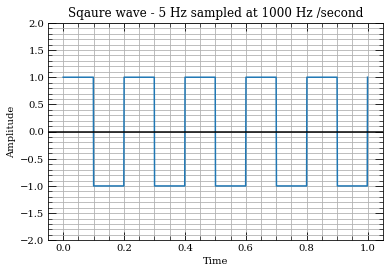

In [25]:
from scipy import signal

import matplotlib.pyplot as plot

import numpy as np

 

# Sampling rate 1000 hz / second

t = np.linspace(0, 1, 1000, endpoint=True)

 

# Plot the square wave signal

plot.plot(t, signal.square(2 * np.pi * 5 * t))

 

# Give a title for the square wave plot

plot.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')

 

# Give x axis label for the square wave plot

plot.xlabel('Time')

 

# Give y axis label for the square wave plot

plot.ylabel('Amplitude')

 

plot.grid(True, which='both')

 

# Provide x axis and line color

plot.axhline(y=0, color='k')

 

# Set the max and min values for y axis

plot.ylim(-2, 2)

 

# Display the square wave drawn

plot.show()